In [1]:
import glob
import os
import pickle
import random
import sys

import ivac
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import prettypyplot as pplt
import pyemma
import scipy
import seaborn as sns
from matplotlib import ticker
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors

import extq

In [2]:
! source /project/dinner/scguo/upside2/sourceme.sh

In [3]:
# upside_path = os.environ["UPSIDE_HOME"]
upside_path = "/project/dinner/scguo/upside2/"
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

In [4]:
plt.style.use("custom")  # custom style sheet
plt.style.use("vibrant")  # muted color theme from SciencePlots
pplt.load_cmaps()

In [13]:
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}\sisetup{detect-all}\usepackage{helvet}\usepackage{sansmath}\sansmath'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'

In [6]:
rate_lags = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000], dtype=int)

# fs -> gs

In [14]:
temps = [87, 89, 91]
rates_fs2gs, rates_gs2fs = [], []
for t in temps:
    base_dir = f"/project/dinner/scguo/kaiB/dga/{t}"
    rates_lags = np.load(f"{base_dir}/dga_data/rates_fs2gs.npy")
    rates_fs2gs.append(rates_lags)
    rates_lags = np.load(f"{base_dir}/dga_data/rates_gs2fs.npy")
    rates_gs2fs.append(rates_lags)

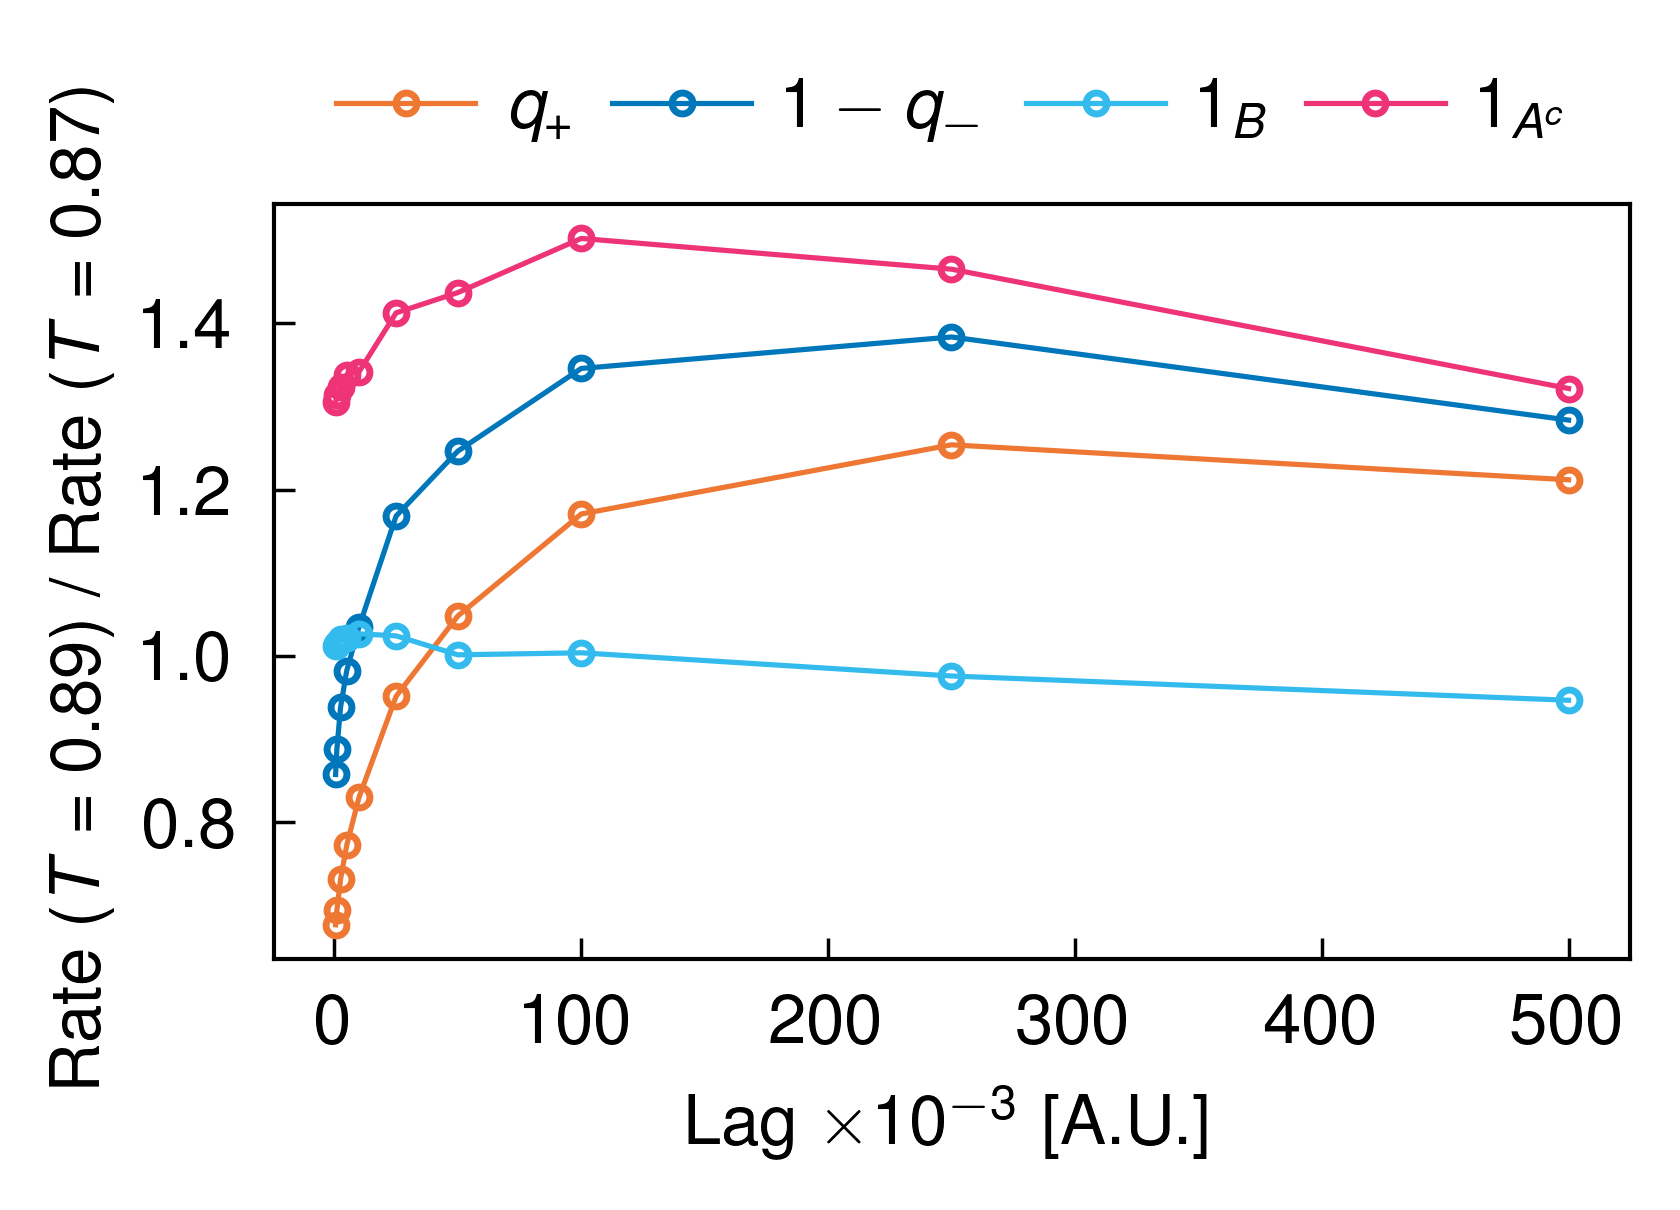

In [17]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()
# best looks like q of 5000 frames
labels = [
    r'$q_+$', 
    r'$1 - q_-$',
    r'$\mathbf{1}_B$',
    r'$\mathbf{1}_{A^c}$']

rates_87 = rates_fs2gs[0][4]
rates_89 = rates_fs2gs[1][4]
for r87, r89, label in zip(rates_87, rates_89, labels):
    # time steps in 0.1 ns
    ax.plot(rate_lags * 50 * 1e-3, r89 / r87, 'o-', mfc='none', ms=3, label=label)
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"Rate ($T = 0.89$) / Rate ($T = 0.87$)")
pplt.legend(outside='top', ncol=4, ax=ax, handletextpad=0.5)

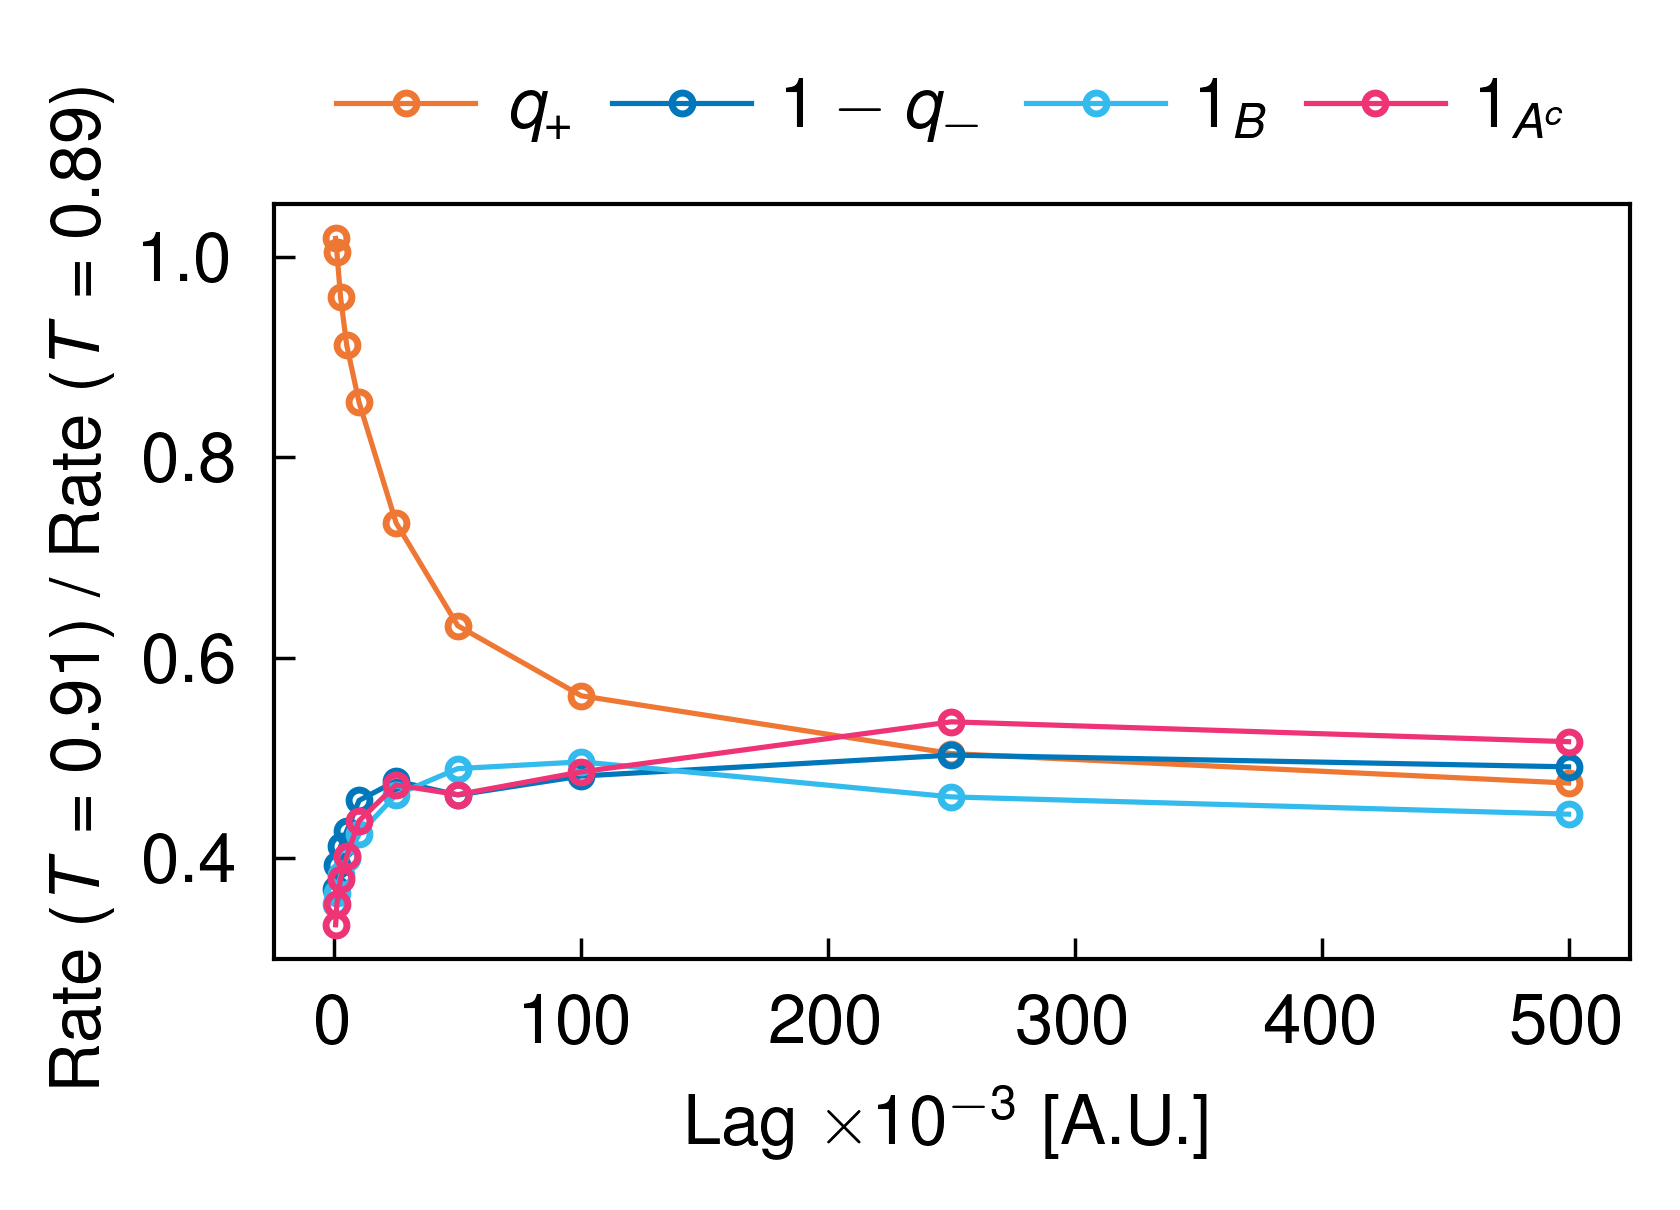

In [22]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()
# best looks like q of 5000 frames
labels = [
    r'$q_+$', 
    r'$1 - q_-$',
    r'$\mathbf{1}_B$',
    r'$\mathbf{1}_{A^c}$']

rates_89 = rates_fs2gs[1][4]
rates_91 = rates_fs2gs[2][4]
for r89, r91, label in zip(rates_89, rates_91, labels):
    # time steps in 0.1 ns
    ax.plot(rate_lags * 50 * 1e-3, r91 / r89, 'o-', mfc='none', ms=3, label=label)
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"Rate ($T = 0.91$) / Rate ($T = 0.89$)")
pplt.legend(outside='top', ncol=4, ax=ax, handletextpad=0.5)

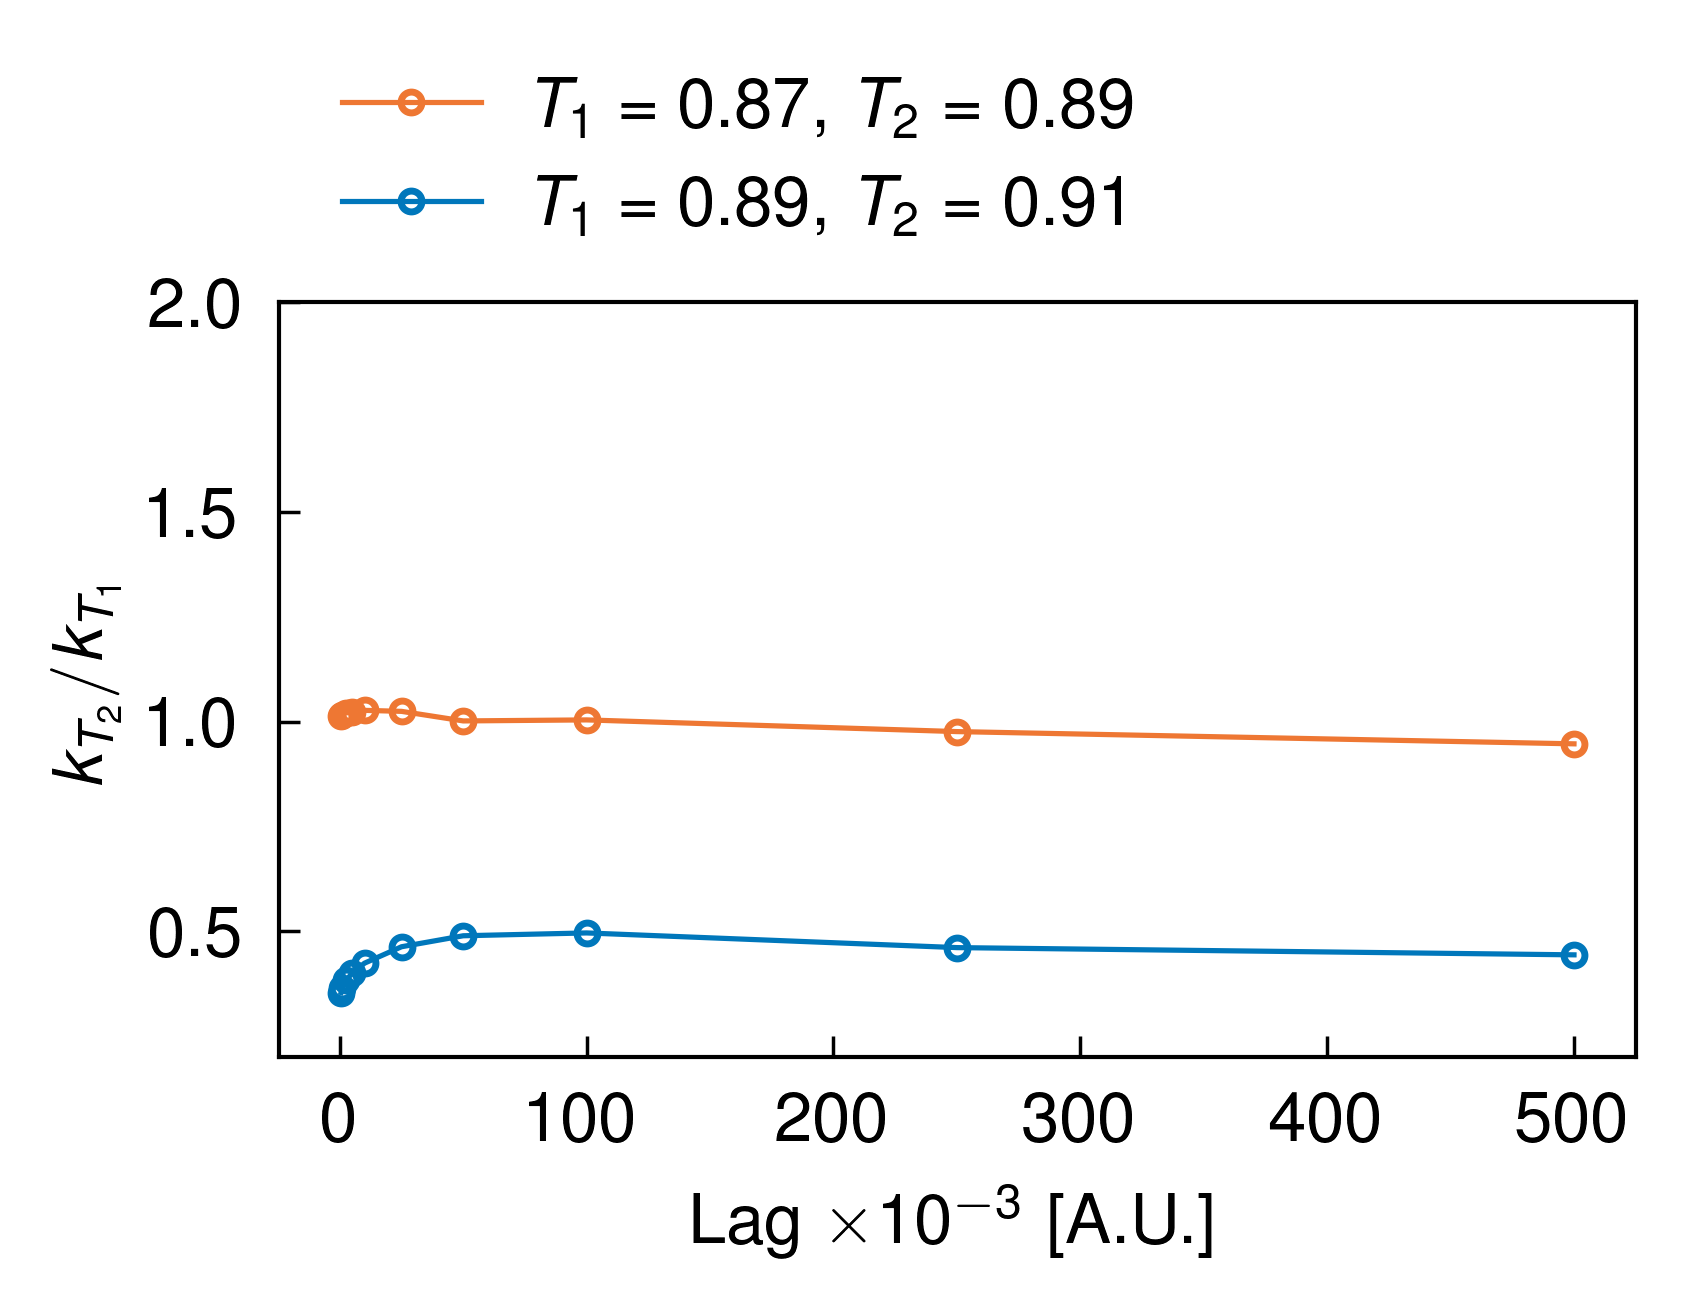

In [24]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()

# use 1_B 
r87 = rates_fs2gs[0][4][2]
r89 = rates_fs2gs[1][4][2]
r91 = rates_fs2gs[2][4][2]

# time steps in 0.1 ns
ax.plot(rate_lags * 50 * 1e-3, r89 / r87, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.87$, $T_2 = 0.89$')
ax.plot(rate_lags * 50 * 1e-3, r91 / r89, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.89$, $T_2 = 0.91$')
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"$k_{T_2} / k_{T_1}$")
ax.set_ylim([0.2, 2])
pplt.legend(outside='top', ncol=1, ax=ax)

# gs-> fs

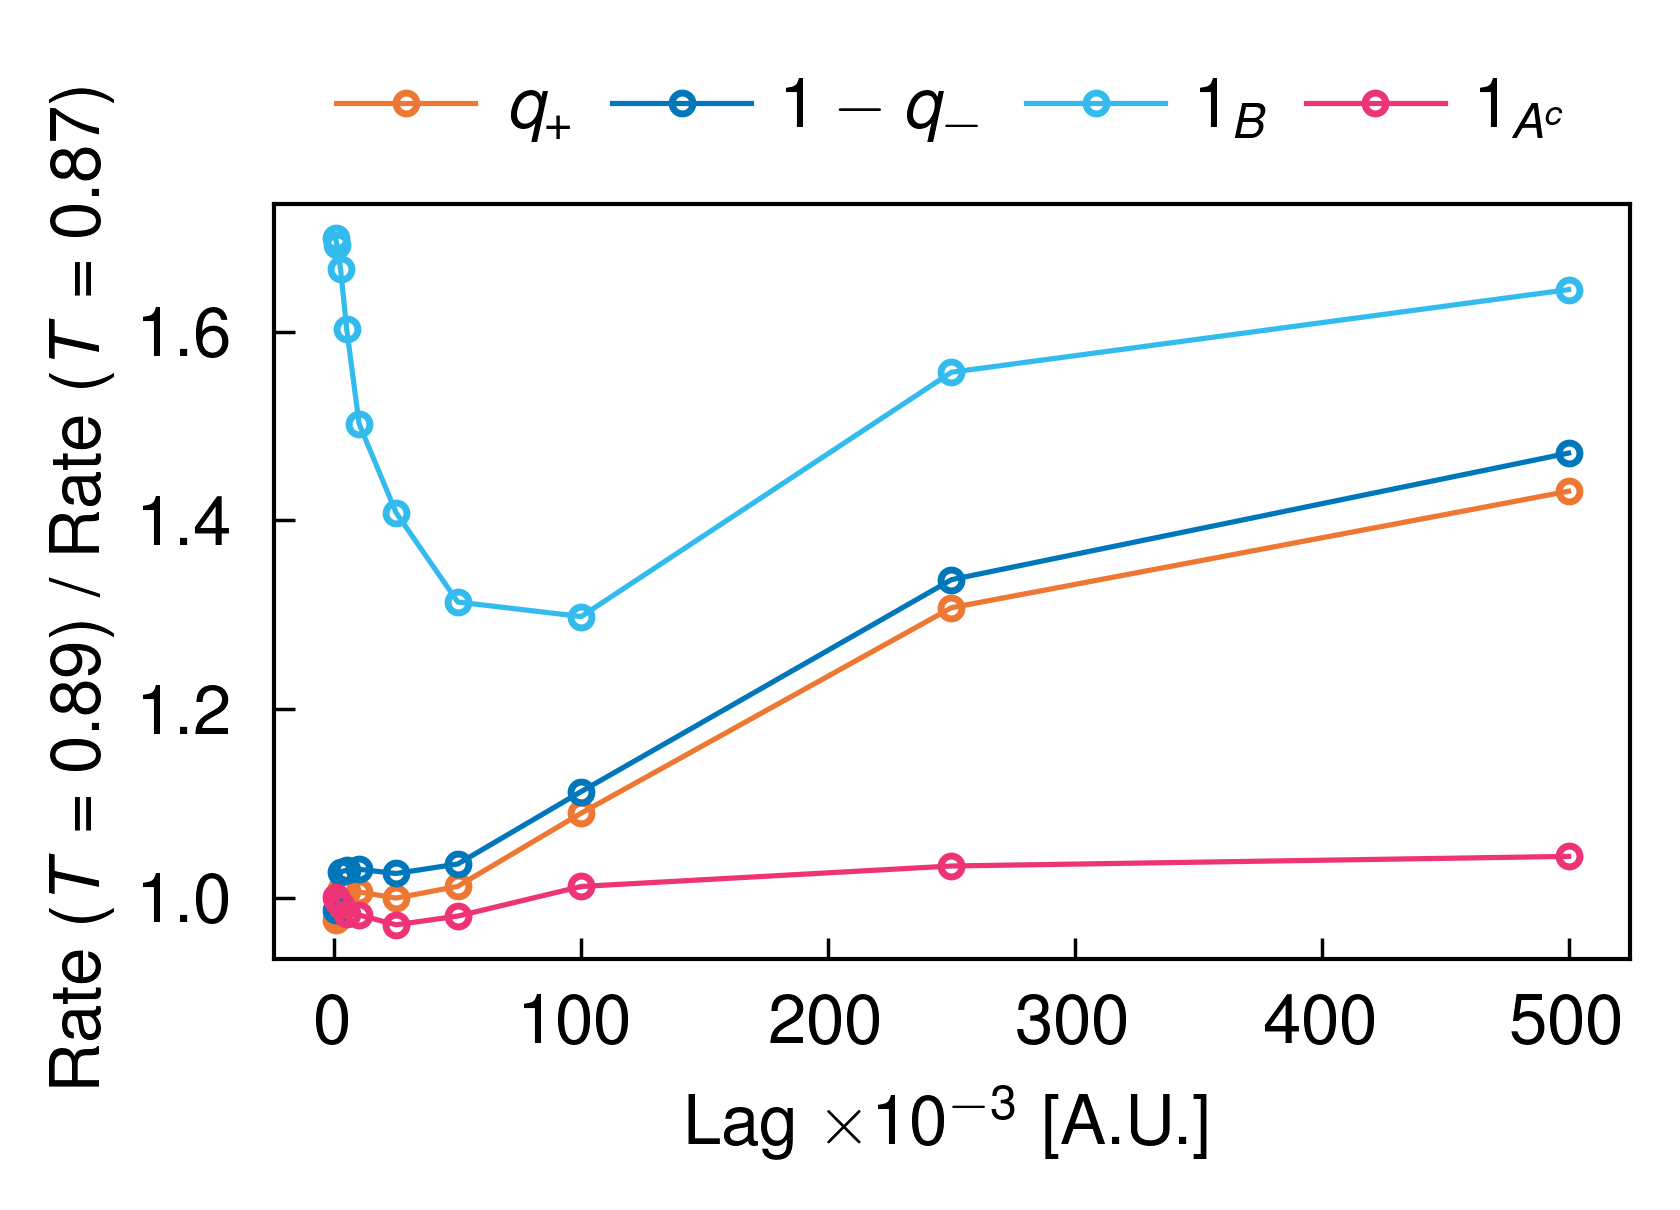

In [25]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()
# best looks like q of 5000 frames
labels = [
    r'$q_+$', 
    r'$1 - q_-$',
    r'$\mathbf{1}_B$',
    r'$\mathbf{1}_{A^c}$']

rates_87 = rates_gs2fs[0][4]
rates_89 = rates_gs2fs[1][4]
for r87, r89, label in zip(rates_87, rates_89, labels):
    # time steps in 0.1 ns
    ax.plot(rate_lags * 50 * 1e-3, r89 / r87, 'o-', mfc='none', ms=3, label=label)
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"Rate ($T = 0.89$) / Rate ($T = 0.87$)")
pplt.legend(outside='top', ncol=4, ax=ax, handletextpad=0.5)

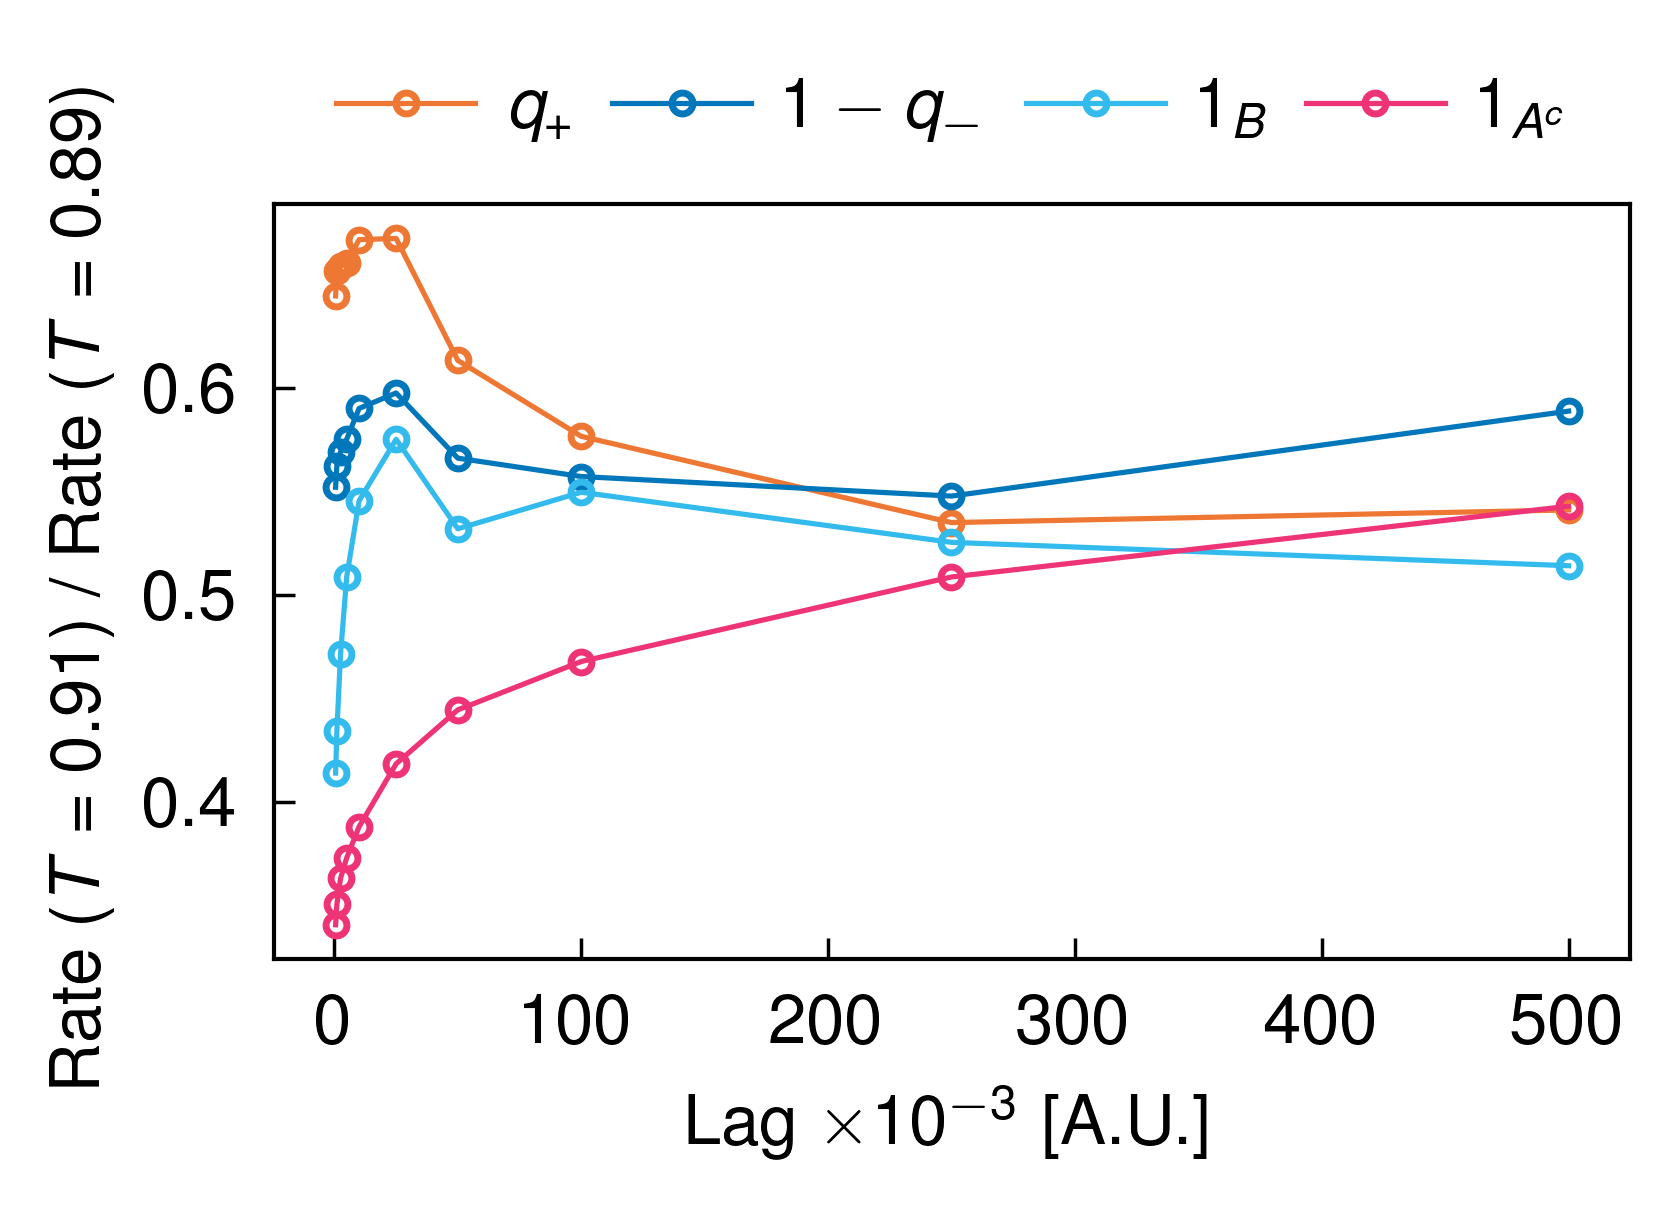

In [26]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()
# best looks like q of 5000 frames
labels = [
    r'$q_+$', 
    r'$1 - q_-$',
    r'$\mathbf{1}_B$',
    r'$\mathbf{1}_{A^c}$']

rates_89 = rates_gs2fs[1][4]
rates_91 = rates_gs2fs[2][4]
for r89, r91, label in zip(rates_89, rates_91, labels):
    # time steps in 0.1 ns
    ax.plot(rate_lags * 50 * 1e-3, r91 / r89, 'o-', mfc='none', ms=3, label=label)
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"Rate ($T = 0.91$) / Rate ($T = 0.89$)")
pplt.legend(outside='top', ncol=4, ax=ax, handletextpad=0.5)

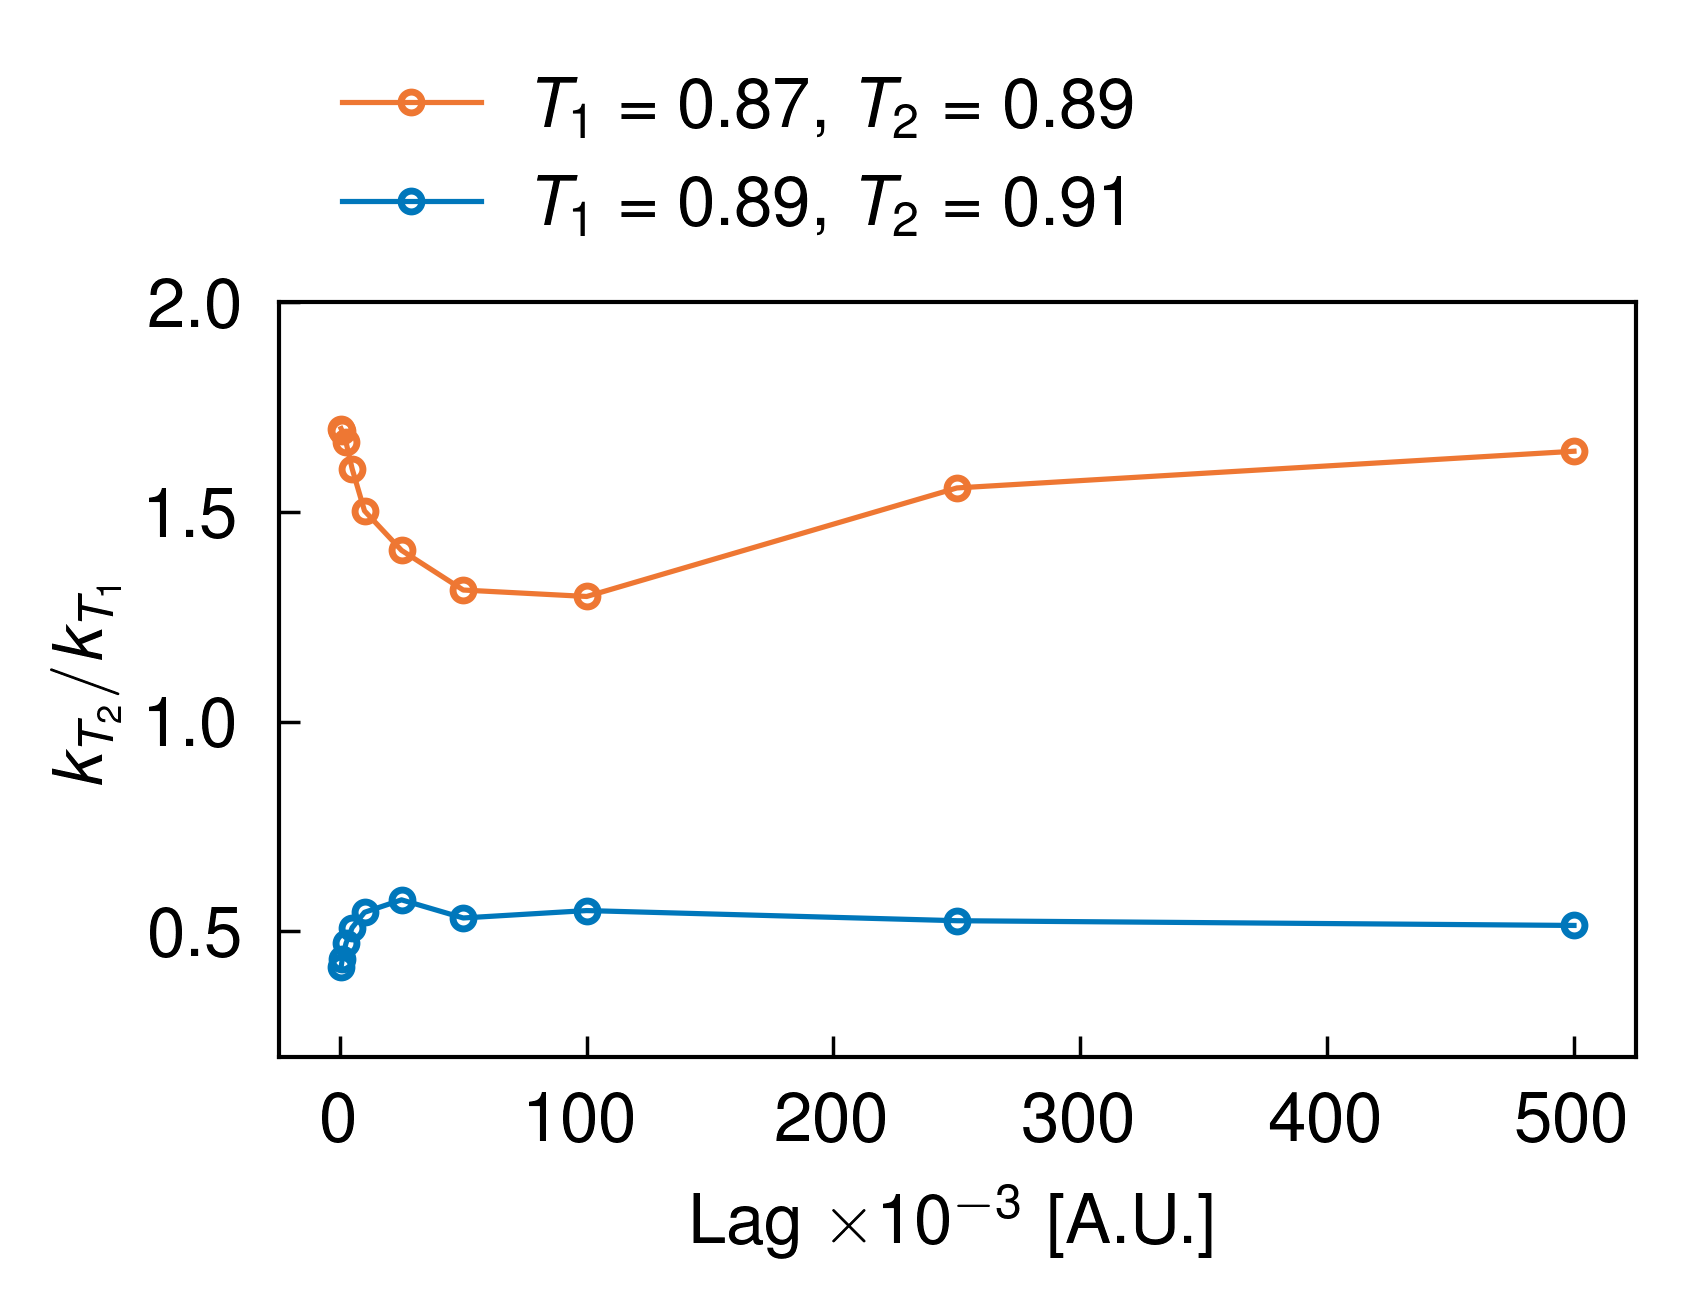

In [27]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()

# use 1_B 
r87 = rates_gs2fs[0][4][2]
r89 = rates_gs2fs[1][4][2]
r91 = rates_gs2fs[2][4][2]

# time steps in 0.1 ns
ax.plot(rate_lags * 50 * 1e-3, r89 / r87, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.87$, $T_2 = 0.89$')
ax.plot(rate_lags * 50 * 1e-3, r91 / r89, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.89$, $T_2 = 0.91$')
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"$k_{T_2} / k_{T_1}$")
ax.set_ylim([0.2, 2])
pplt.legend(outside='top', ncol=1, ax=ax)

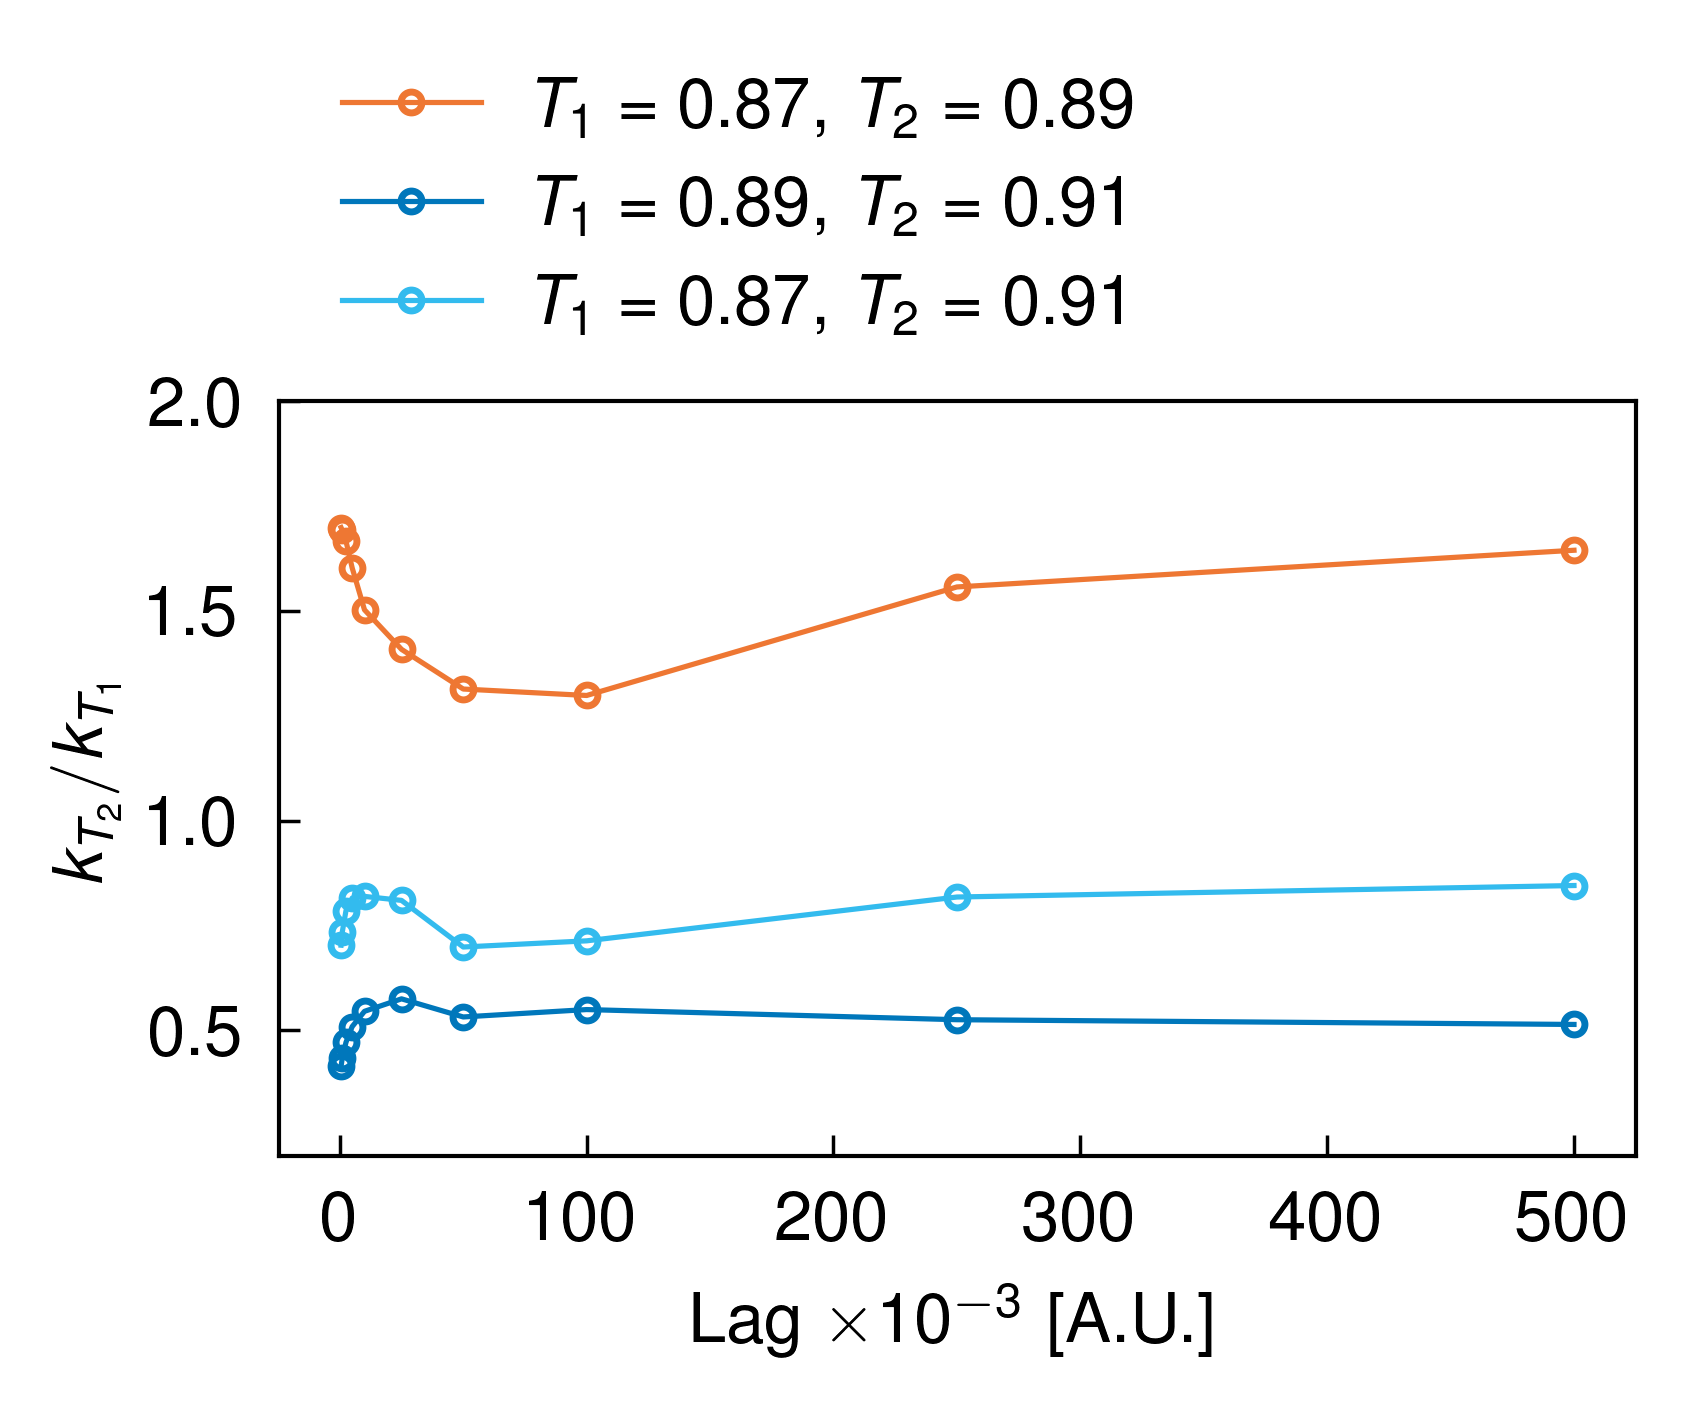

In [28]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()

# use 1_B 
r87 = rates_gs2fs[0][4][2]
r89 = rates_gs2fs[1][4][2]
r91 = rates_gs2fs[2][4][2]

# time steps in 0.1 ns
ax.plot(rate_lags * 50 * 1e-3, r89 / r87, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.87$, $T_2 = 0.89$')
ax.plot(rate_lags * 50 * 1e-3, r91 / r89, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.89$, $T_2 = 0.91$')
ax.plot(rate_lags * 50 * 1e-3, r91 / r87, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.87$, $T_2 = 0.91$')
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"$k_{T_2} / k_{T_1}$")
ax.set_ylim([0.2, 2])
pplt.legend(outside='top', ncol=1, ax=ax)

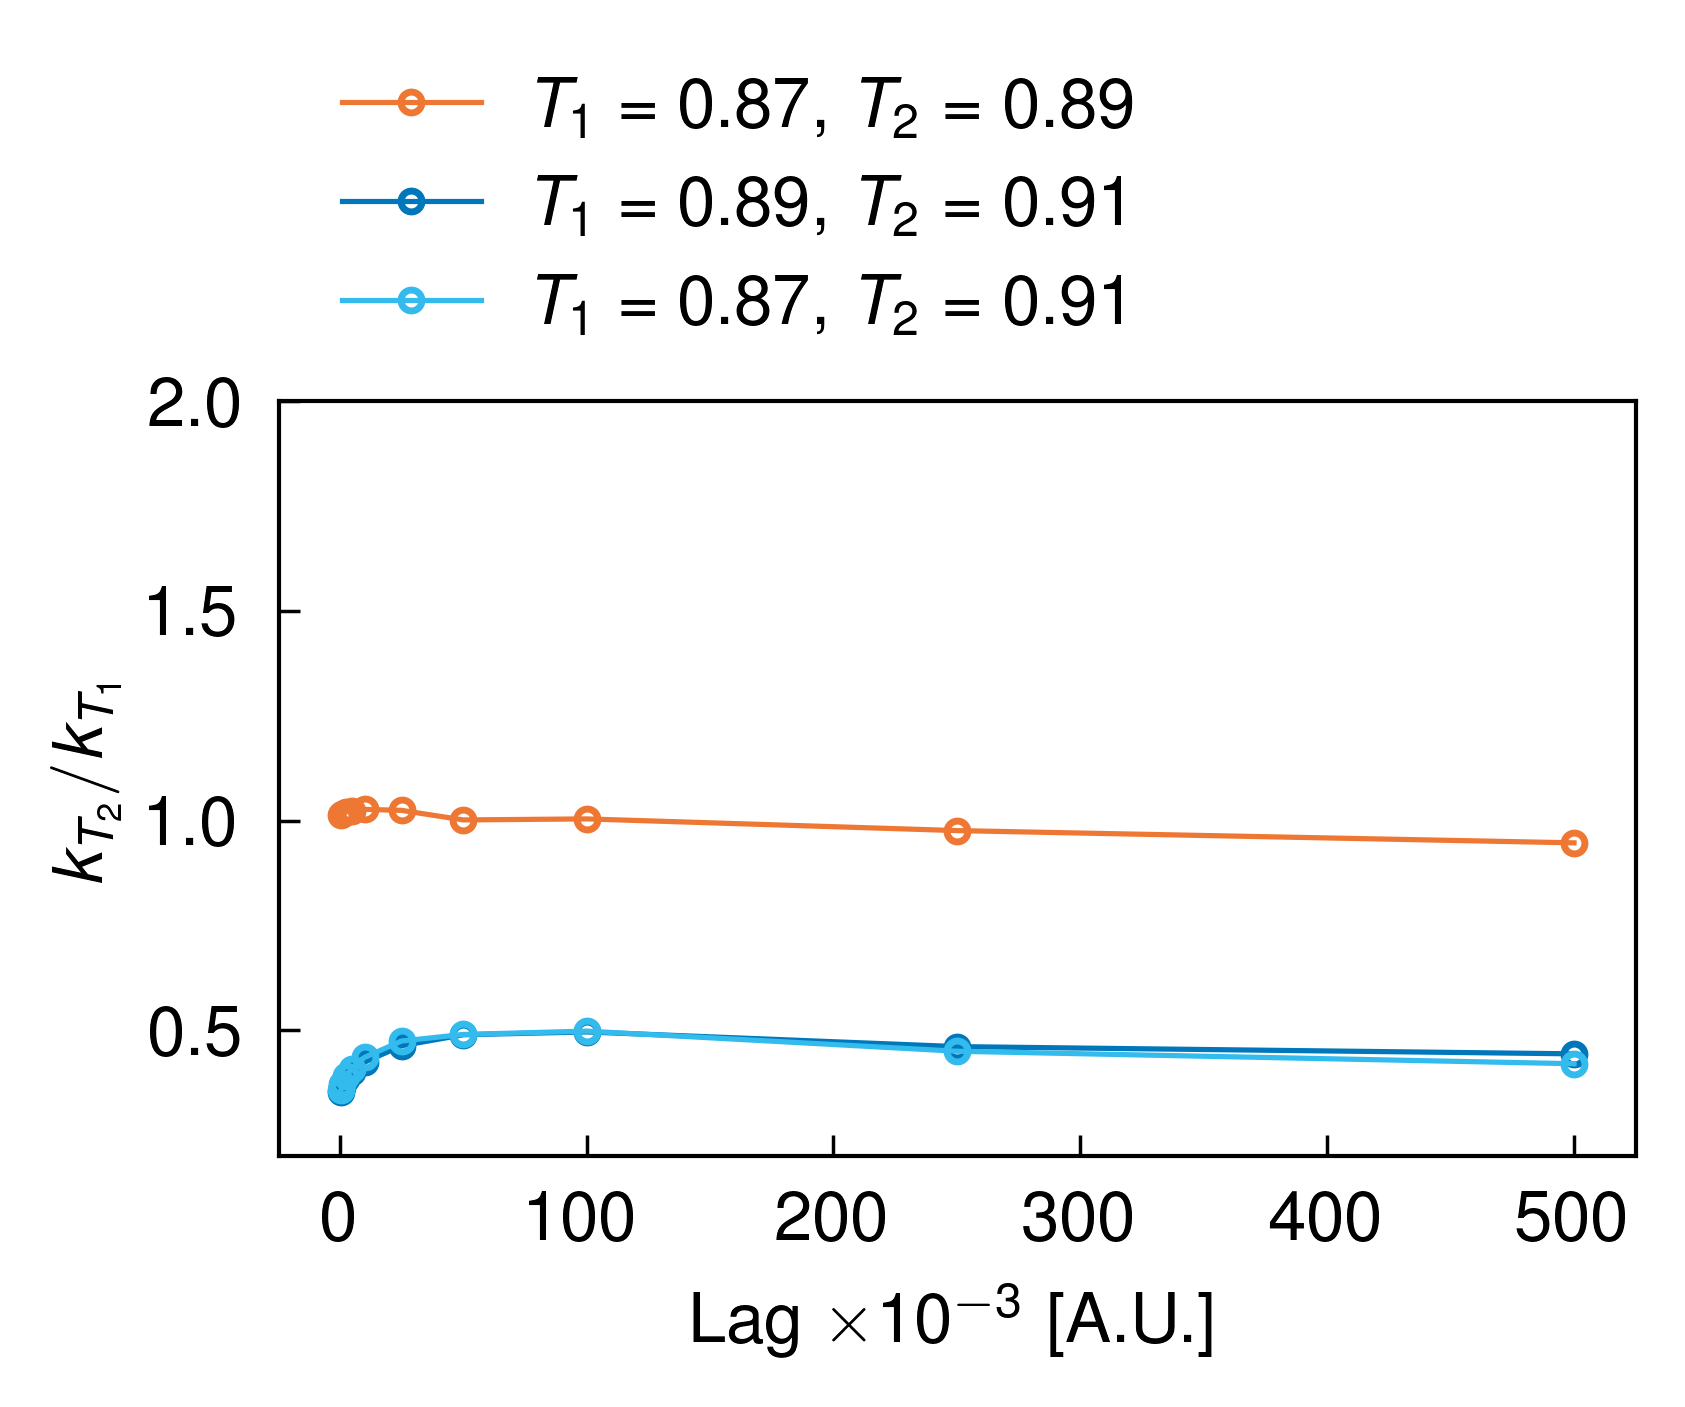

In [29]:
f = plt.figure(figsize=(3.5, 2), dpi=500)
ax = plt.gca()

# use 1_B 
r87 = rates_fs2gs[0][4][2]
r89 = rates_fs2gs[1][4][2]
r91 = rates_fs2gs[2][4][2]

# time steps in 0.1 ns
ax.plot(rate_lags * 50 * 1e-3, r89 / r87, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.87$, $T_2 = 0.89$')
ax.plot(rate_lags * 50 * 1e-3, r91 / r89, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.89$, $T_2 = 0.91$')
ax.plot(rate_lags * 50 * 1e-3, r91 / r87, 'o-', mfc='none', ms=3, label=r'$T_1 = 0.87$, $T_2 = 0.91$')
    
ax.set_xlabel(r"Lag $\times 10^{-3}$ [A.U.]")
ax.set_ylabel(r"$k_{T_2} / k_{T_1}$")
ax.set_ylim([0.2, 2])
pplt.legend(outside='top', ncol=1, ax=ax)